# Mini-Project 2

**Description:** Working from Lab10, Question 4 and Lab 11, Question 3, run the text snippet through SpaCy
for preprocessing and obtain the NER and the dependency graphs for each sentence. You now have certain token
(sequences) labelled as a named entity and typed as a person or an institution. You also have the dependency
graph, that connects each named entity with words in the graph (each token has exactly one governor. Some
nodes have one or more dependents, some have none.

In [224]:
# import libraries 
from afinn import Afinn
import pandas as pd
import spacy
from spacy import displacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

## 1. SpaCy sentence and token splits for S1

In [4]:
# S1 text snippet
s1 = 'U.S. intelligence agencies concluded in January 2017 that Russia mounted a far-ranging influence campaign aimed at helping Trump beat Clinton. And the bipartisan Senate Intelligence Committee, after three years of investigation, affirmed those conclusions, saying intelligence officials had specific information that Russia preferred Trump and that Russian President Vladimir Putin had \"approved and directed aspects\" of the Kremlin\'s influence campaign.'

In [5]:
# load the language model
nlp = spacy.load("en_core_web_sm")

In [7]:
# preprocess the text
doc = nlp(s1)

In [14]:
# print sentence splits
for sent in doc.sents:
    print(sent.text)

U.S. intelligence agencies concluded in January 2017 that Russia mounted a far-ranging influence campaign aimed at helping Trump beat Clinton.
And the bipartisan Senate Intelligence Committee, after three years of investigation, affirmed those conclusions, saying intelligence officials had specific information that Russia preferred Trump and that Russian President Vladimir Putin had "approved and directed aspects" of the Kremlin's influence campaign.


In [20]:
# print token splits
for token in doc:
    print(token.text, token.head)

U.S. agencies
intelligence agencies
agencies concluded
concluded concluded
in concluded
January in
2017 January
that mounted
Russia mounted
mounted concluded
a campaign
far ranging
- ranging
ranging campaign
influence campaign
campaign mounted
aimed campaign
at aimed
helping at
Trump beat
beat helping
Clinton beat
. concluded
And affirmed
the Committee
bipartisan Committee
Senate Committee
Intelligence Committee
Committee affirmed
, affirmed
after affirmed
three years
years after
of years
investigation of
, affirmed
affirmed affirmed
those conclusions
conclusions affirmed
, affirmed
saying affirmed
intelligence officials
officials had
had saying
specific information
information had
that preferred
Russia preferred
preferred information
Trump preferred
and had
that approved
Russian President
President Putin
Vladimir Putin
Putin approved
had approved
" approved
approved had
and approved
directed approved
aspects approved
" aspects
of aspects
the Kremlin
Kremlin campaign
's Kremlin
influen

## 2. Graphical representation of NER and dependency graphs for S1

In [12]:
# NER graph for S1
displacy.render(doc, style="ent")

In [13]:
# Dependecy graph for S1
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style="dep")

## 3. Sentiment Analysis
### Sentiment analysis on sentences

Perform sentiment analysis with aFinn on all sentences. You now have a prediction whether each sentence is neutral, positive or negative. Through lookup in the aFinn lexicon, you also know the sentiment value of each word (if it is not present, mark the word as neutral, i.e. not carrying sentiment).

In [119]:
#instantiating afinn
afn = Afinn()
           
# computing scores for each sentence & assigning a sentiment
scores = [afn.score(sent.text) for sent in doc.sents]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]
      
# creating a dataframe for the results
df_se = pd.DataFrame()
sentences = list(doc.sents)
df_se['documents'] =  sentences
df_se['scores'] = scores
df_se['sentiments'] = sentiment
print(df_se)

                                           documents  scores sentiments
0  (U.S., intelligence, agencies, concluded, in, ...     2.0   positive
1  (And, the, bipartisan, Senate, Intelligence, C...     2.0   positive


### Sentiment analysis on tokens

In [122]:
# computing scores for each token & assigning a sentiment
scores = [afn.score(article.text) for article in doc]
sentiment = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in scores]
      
# creating a dataframe for the results
df_tok = pd.DataFrame()
df_tok['documents'] =  doc
df_tok['scores'] = scores
df_tok['sentiments'] = sentiment
df_tok

,documents,scores,sentiments
0,U.S.,0.0,neutral
1,intelligence,0.0,neutral
2,agencies,0.0,neutral
3,concluded,0.0,neutral
4,in,0.0,neutral
...,...,...,...
65,Kremlin,0.0,neutral
66,'s,0.0,neutral
67,influence,0.0,neutral
68,campaign,0.0,neutral


## 4. T1S1 and T2S1 for the snippet

### Creating table T1

In [120]:
# generating sentence semintiments for each token
sent_sentiments = []
for i in range(len(df_se['documents'])):
    for k in range(len(df_se['documents'][i])):
        sent_sentiments.append(df_se['sentiments'][i])

In [225]:
#t1 table
t1 = pd.DataFrame()
t1['tokens'] = list(doc)
t1['NE'] = [0 if token.ent_type_ == '' else 1 for token in doc]
t1['NE_type'] = [token.ent_type_ for token in doc]
t1['Governor'] = [token.head for token in doc]
t1['SentimentValueofToken'] = df_tok['sentiments']
t1['SentimentValueofSentence'] = sent_sentiments
t1

,tokens,NE,NE_type,Governor,SentimentValueofToken,SentimentValueofSentence
0,U.S.,1,GPE,agencies,neutral,positive
1,intelligence,0,,agencies,neutral,positive
2,agencies,0,,concluded,neutral,positive
3,concluded,0,,concluded,neutral,positive
4,in,0,,concluded,neutral,positive
...,...,...,...,...,...,...
65,Kremlin,1,ORG,campaign,neutral,positive
66,'s,0,,Kremlin,neutral,positive
67,influence,0,,campaign,neutral,positive
68,campaign,0,,of,neutral,positive


### Creating table T2

In [226]:
# t2 table
t2 = t1[(t1['NE'] == 1)] # extract NE tokens
t2 = t2.drop('NE', axis=1).reset_index(drop=True) #drop NE column
t2

,tokens,NE_type,Governor,SentimentValueofToken,SentimentValueofSentence
0,U.S.,GPE,agencies,neutral,positive
1,January,DATE,in,neutral,positive
2,2017,DATE,January,neutral,positive
3,Russia,GPE,mounted,neutral,positive
4,Trump,PERSON,beat,neutral,positive
5,Clinton,PERSON,beat,neutral,positive
6,Senate,ORG,Committee,neutral,positive
7,Intelligence,ORG,Committee,neutral,positive
8,Committee,ORG,affirmed,neutral,positive
9,three,DATE,years,neutral,positive


In [227]:
# exporting tables to csv
t1.to_csv('t1.csv', index=False)
t2.to_csv('t2.csv', index=False)

## 5. K-Means Clustering
### 3-means clusters for the entire text

In [228]:
# read text file
with open('APonTrump') as f:
    text = f.read()
    
doc = nlp(text)

In [249]:
# transform text with ifidf vectorizer 
vectorizer = TfidfVectorizer(stop_words='english', lowercase=False)
X = vectorizer.fit_transform([token.text for token in doc])

# train kmeans model with mean 3
model = KMeans(n_clusters=3).fit(X)

# print top 10 words in each cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 Russia
 said
 campaign
 legal
 investigation
 claims
 suit
 FBI
 It
 2016
Cluster 1:
 concluded
 yelled
 censored
 cheers
 charges
 charged
 chant
 challenging
 challenged
 chairman
Cluster 2:
 Trump
 yelled
 censored
 cheers
 charges
 charged
 chant
 challenging
 challenged
 chairman


### 2-means cluster for entire text

In [250]:
# train kmeans model with mean 2
model = KMeans(n_clusters=2).fit(X)
# print top 10 words in each cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 Trump
 said
 campaign
 legal
 investigation
 claims
 FBI
 2016
 suit
 It
Cluster 1:
 Russia
 yelled
 choice
 cheers
 charges
 charged
 chant
 challenging
 challenged
 chairman


### Finding a good value for k

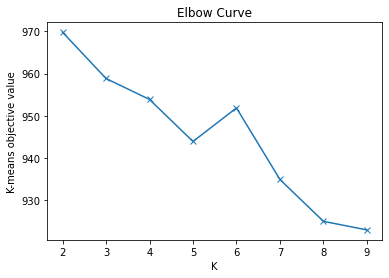

In [251]:
# Elbow curve method for choosing a good value for k
inertia = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertia.append(kmeans.inertia_)
    
plt.plot(K, inertia, 'x-')
plt.xlabel('K')
plt.ylabel('K-means objective value')
plt.title('Elbow Curve')
plt.show()